In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("taxi_trip_pricing.csv")

In [9]:
df.head(3)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [85]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       562 non-null    float64
 1   Time_of_Day            562 non-null    object 
 2   Day_of_Week            562 non-null    object 
 3   Passenger_Count        562 non-null    float64
 4   Traffic_Conditions     562 non-null    object 
 5   Weather                562 non-null    object 
 6   Base_Fare              562 non-null    float64
 7   Per_Km_Rate            562 non-null    float64
 8   Per_Minute_Rate        562 non-null    float64
 9   Trip_Duration_Minutes  562 non-null    float64
 10  Trip_Price             562 non-null    float64
dtypes: float64(7), object(4)
memory usage: 52.7+ KB


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
12,41.79,Night,Weekend,3.0,High,Clear,4.60,1.77,0.11,86.95,88.1328
14,9.91,Evening,Weekday,2.0,High,Clear,2.32,1.26,0.34,41.72,28.9914


In [45]:
x=df.iloc[:,[0,3,6,7,8,9]].values
x

array([[ 19.35,   3.  ,   3.56,   0.8 ,   0.32,  53.82],
       [ 36.87,   1.  ,   2.7 ,   1.21,   0.15,  37.27],
       [  8.64,   2.  ,   2.55,   1.71,   0.48,  89.33],
       ...,
       [ 18.69,   3.  ,   4.9 ,   1.79,   0.17,  79.41],
       [  5.49,   4.  ,   2.39,   0.62,   0.49,  58.39],
       [ 47.56,   1.  ,   2.67,   0.82,   0.17, 114.94]])

In [46]:
y=df.iloc[:,10].values
y

array([ 36.2624    ,  52.9032    ,  60.2028    ,  88.1328    ,
        28.9914    ,  27.4415    ,  56.716     ,  69.0049    ,
        44.7782    , 201.86950919,  39.2366    , 280.87730155,
        24.2608    ,  58.8121    ,  20.7765    ,  61.5552    ,
        54.1018    ,  40.9225    ,  20.791     ,  57.0482    ,
        42.9921    ,  30.9982    ,  44.844     ,  44.1197    ,
        20.1596    ,  57.0766    ,  41.9343    ,  72.2695    ,
        99.8989    ,  37.1504    ,  78.715     ,  59.181     ,
        69.6575    , 320.95866358,  61.4595    ,  68.3748    ,
        71.2142    ,  69.5281    ,  11.3358    ,  36.4388    ,
       104.2421    ,  16.9284    ,  94.2463    ,  87.6076    ,
        42.8661    ,  11.2613    ,  42.9949    ,  76.2217    ,
        59.7613    ,  29.4658    ,  40.4165    , 105.9418    ,
        33.0286    ,  27.865     ,  62.4923    ,  58.7766    ,
        73.4155    ,  31.99      ,  34.3067    , 233.00828521,
       274.5350868 ,  99.8038    ,  29.532     ,  30.44

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [48]:
x_train.shape

(449, 6)

In [49]:
y_train.shape

(449,)

In [78]:
clf=DecisionTreeRegressor(criterion= 'poisson',
 max_depth= 8,
 max_features= 0.5,
 min_samples_split= 0.25)

clf.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=8, max_features=0.5,
                      min_samples_split=0.25)

In [79]:
y_pred=clf.predict(x_test)

In [80]:
r2_score(y_test,y_pred)

0.7667069037355074

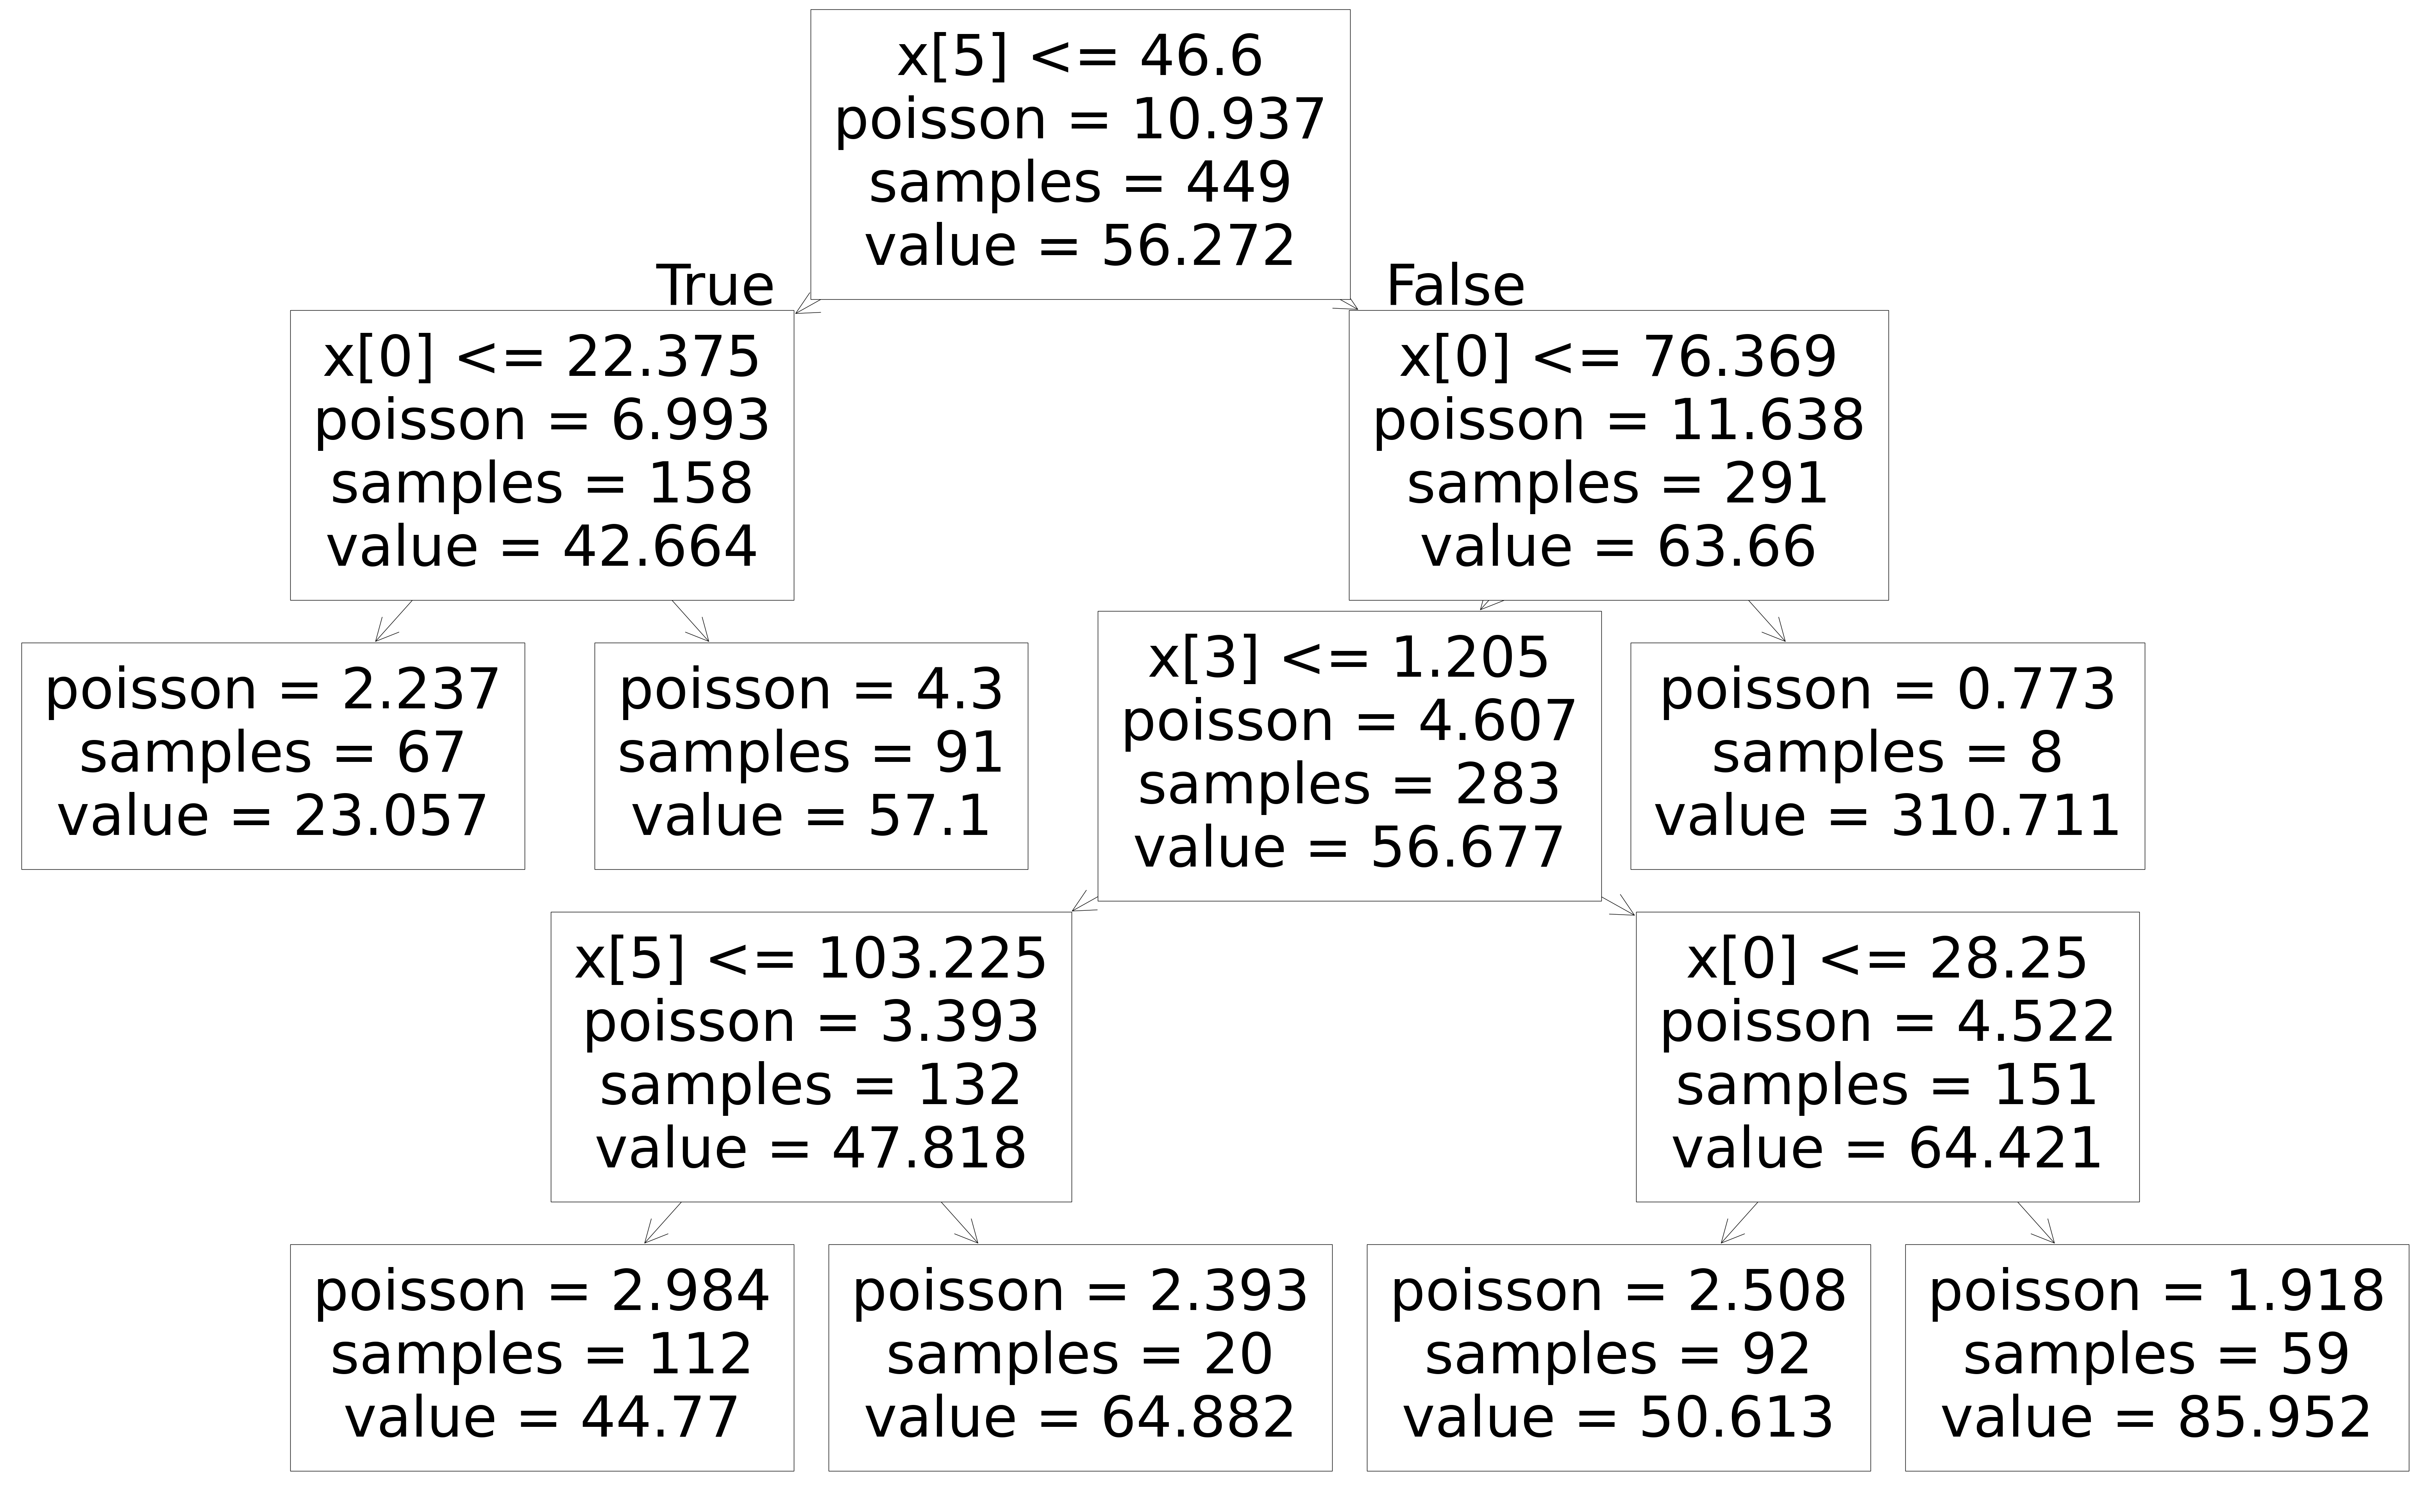

In [81]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50

plot_tree(clf)

plt.show()

In [82]:
param_dist={
    'max_depth':[2,4,8,10,None],
    'criterion':['absolute_error','poisson','freidman mse'],
    'max_features':[0.25,0.5,1],
    'min_samples_split':[0.25,0.5,1]
}

In [83]:
reg=GridSearchCV(DecisionTreeRegressor(),param_grid=param_dist)

In [84]:
reg.fit(x_train,y_train)

C:\Users\Shantanoo Aher\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
375 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shantanoo Aher\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shantanoo Aher\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Shantanoo Aher\AppData\Local\Programs\Python\Pyth

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['absolute_error', 'poisson',
                                       'freidman mse'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1],
                         'min_samples_split': [0.25, 0.5, 1]})

In [77]:
reg.best_params_

{'criterion': 'poisson',
 'max_depth': 8,
 'max_features': 0.5,
 'min_samples_split': 0.25}